## TRAVEL AGGREGATOR ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bookings = pd.read_csv('Bookings.csv')
sessions = pd.read_csv('Sessions.csv')

#### 1. Find the number of distinct bookings, sessions, and searches from the given datasets.

In [3]:
# Unique booking IDs
unique_bookings = bookings['booking_id'].nunique()

# Unique session IDs
unique_sessions = sessions['session_id'].nunique()

# Unique search IDs
unique_searches = sessions['search_id'].nunique()

print("Unique Booking IDs:" , unique_bookings)
print("Unique Session IDs:" , unique_sessions)
print("Unique Search IDs:" , unique_searches)

Unique Booking IDs: 339
Unique Session IDs: 331
Unique Search IDs: 1360


#### 2. How many sessions have more than one booking

In [4]:
# Group by session ID and count unique bookings
session_booking_counts = sessions.groupby('session_id')['booking_id'].nunique()

# Filter sessions with more than one booking
sessions_with_multiple_bookings = session_booking_counts[session_booking_counts > 1]
print(sessions_with_multiple_bookings)

# Get the total count
total_sessions = len(sessions_with_multiple_bookings)

print("Total sessions with more than one booking:", total_sessions)

session_id
session_134    2
session_154    2
session_196    2
session_231    2
session_27     2
session_290    2
session_298    2
session_324    2
session_50     2
session_76     2
Name: booking_id, dtype: int64
Total sessions with more than one booking: 10


#### 3. Which days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution for all days of the week

In [5]:
bookings.booking_time = pd.to_datetime(bookings.booking_time)
bookings['booking_day']=bookings.booking_time.apply(lambda x:x.day_name())
booking_day_summary = bookings.booking_day.value_counts()
booking_day_summary

Thursday     65
Tuesday      59
Monday       51
Friday       51
Saturday     44
Sunday       35
Wednesday    34
Name: booking_day, dtype: int64

In [6]:
print("Day with highest bookings:" , booking_day_summary.index[0])

Day with highest bookings: Thursday


In [7]:
type(booking_day_summary)

pandas.core.series.Series

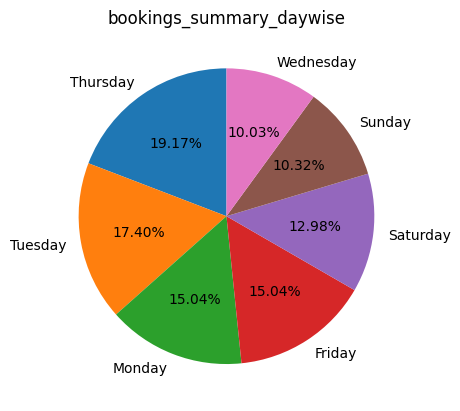

In [8]:
plt.pie(booking_day_summary.values,labels=booking_day_summary.index,startangle=90,autopct='%.2f%%')
plt.title("bookings_summary_daywise")
plt.show()

#### 4. For each of the service names, display the total number of bookings and the total Gross Booking Value in INR

In [9]:
# Group by service name and count bookings
booking_counts = bookings.groupby('service_name')['booking_id'].count()

# Calculate the total Gross Booking Value (sum of INR_Amount)
gross_booking_value = bookings.groupby('service_name')['INR_Amount'].sum()

# Combine the results into a DataFrame
result_df = pd.DataFrame({
    'Total Bookings': booking_counts,
    'Total Gross Booking Value (INR)': gross_booking_value
})

# Display the result
print(result_df)

              Total Bookings  Total Gross Booking Value (INR)
service_name                                                 
GOIBIBO                  186                       5897637.97
MMT                       48                        665669.08
YATRA                    105                       3378702.13


#### 5. For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?

In [10]:
# Group by customer ID and count bookings
booking_counts = bookings.groupby('customer_id')['booking_id'].count()

# Filter customers with more than one booking
multi_booking_customers = booking_counts[booking_counts > 1]

# Get the bookings for multi-booking customers
multi_booking_data = bookings[bookings['customer_id'].isin(multi_booking_customers.index)]

# Group by route (from_city to to_city) and count bookings
route_counts = multi_booking_data.groupby(['from_city', 'to_city'])['booking_id'].count()

# Find the most booked route
most_booked_route = route_counts.idxmax()

print("Most booked route:" , most_booked_route)

Most booked route: ('Gurgaon', 'Roissy-en-France')


#### 6. Which are the top 3 departure cities from where customers book mostly in advance, provided that there have been at least 5 departures from that city?

In [11]:
# Group by departure city and count departures
departure_counts = bookings.groupby('from_city')['booking_id'].count()

# Filter cities with at least 5 departures
popular_departures = departure_counts[departure_counts >= 5]

# Sort by departure count in ascending order
sorted_departures = popular_departures.sort_values(ascending=False)

# Get the top 3 departure cities
top_3_cities = sorted_departures.index[:3]

print("Top 3 departure cities for advance bookings:" , top_3_cities.values)

Top 3 departure cities for advance bookings: ['Gurgaon' 'Mumbai' 'Delhi']


#### 7. Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings dataset, have the maximum correlation?

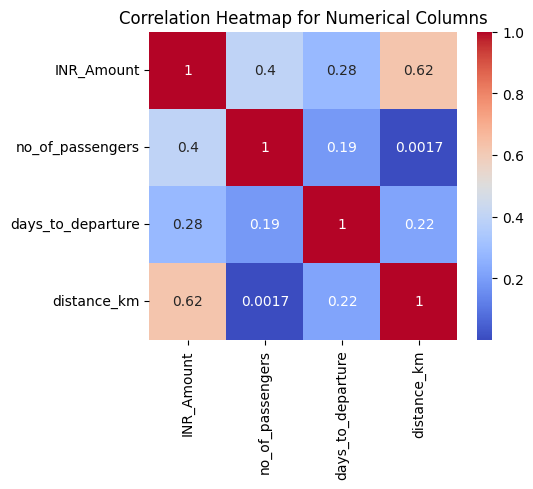

The pair of numerical columns with the maximum correlation is: ('INR_Amount', 'distance_km')


In [12]:
# Select only numerical columns for correlation
numerical_columns = bookings.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap for Numerical Columns")
plt.show()

# Find the pair of columns with maximum correlation remove self-correlation
max_corr_pair = correlation_matrix[correlation_matrix<1].unstack().idxmax()

print("The pair of numerical columns with the maximum correlation is:" ,  max_corr_pair)

#### 8. For each service, which is the most used device type for making bookings on the platform?

In [13]:
# Group by service name and count device types
device_counts = bookings.groupby('service_name')['device_type_used'].value_counts()
device_counts

service_name  device_type_used
GOIBIBO       IOS                 70
              Desktop             61
              Android             44
              MobileWeb           11
MMT           Desktop             30
              Android              8
              IOS                  5
              MobileWeb            5
YATRA         Desktop             51
              IOS                 22
              Android             18
              MobileWeb           11
              Tablet               3
Name: device_type_used, dtype: int64

In [14]:
# Get the most used device type for each service
most_used_devices = device_counts.groupby('service_name').idxmax()
most_used_devices

service_name
GOIBIBO      (GOIBIBO, IOS)
MMT          (MMT, Desktop)
YATRA      (YATRA, Desktop)
Name: device_type_used, dtype: object

In [15]:
print("Most used device type for each service:")
for service, device in most_used_devices.items():
    print(service ,":", device[1])

Most used device type for each service:
GOIBIBO : IOS
MMT : Desktop
YATRA : Desktop


#### 9. Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings performed by each device type

In [16]:
# Convert booking_time to datetime
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])

# Extract year and quarter and create year-quarter column
bookings['year'] = bookings['booking_time'].dt.year
bookings['quarter'] = bookings['booking_time'].dt.quarter
bookings['y-q']=bookings['year'].astype(str) + '-' +  bookings['quarter'].astype(str)

In [17]:
# Group by year, quarter, and device type
booking_counts = bookings.groupby(['y-q', 'device_type_used']).size().reset_index(name='count')

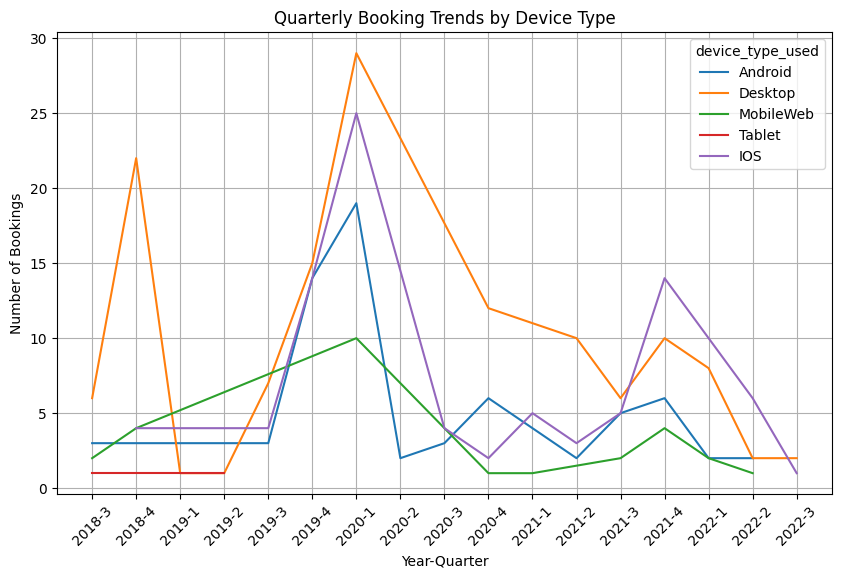

In [18]:
# Create time series plots
plt.figure(figsize=(10, 6))
sns.lineplot(x='y-q', y='count', hue='device_type_used', data=booking_counts)
plt.xticks(rotation=45) 
plt.xlabel('Year-Quarter')
plt.ylabel('Number of Bookings')
plt.title('Quarterly Booking Trends by Device Type')
plt.grid(True)
plt.show()

#### 10. <br>Consider the following example: 12 customers performed a total of 100 searches but</br><br> only a few of them performed 10 bookings in total.</br><br> searches=100 bookings=10 customers=12</br><br>The overall booking to search ratio, Ober, is 10/100 = 0.1 Using the above information/context, answer the following:</br>
- What is the average oBSR for each month of the year?
- What is the average oBSR for each day of the week?
- Plot a time series of oBSR on all the given dates.

In [19]:
# Convert the 'search_time' column to datetime
sessions['search_time'] = pd.to_datetime(sessions['search_time'])

In [20]:
# Extract year and month
sessions['year'] = sessions['search_time'].dt.year
sessions['month'] = sessions['search_time'].dt.month
sessions['y-m']= sessions['search_time'].dt.year.astype(str) + '-' + sessions['search_time'].dt.month.astype(str)

In [21]:
# Calculate the total searches and bookings
total_searches = sessions['search_id'].nunique()
total_bookings = sessions['booking_id'].nunique()

# Calculate the overall booking to search ratio (oBSR)
oBSR = total_bookings / total_searches

In [22]:
print(f"Overall booking to search ratio (oBSR): {oBSR:.2f}")

Overall booking to search ratio (oBSR): 0.25


In [23]:
# Calculate the average oBSR for each month
average_oBSR_year_month = sessions.groupby(['year', 'month'])['booking_id'].nunique() / sessions.groupby(['year', 'month'])['search_id'].nunique()
print("Average oBSR for each year-month:", "\n" , average_oBSR_year_month)

Average oBSR for each year-month: 
 year  month
2018  9        0.387097
      10       0.095238
      11       0.243902
      12       0.193548
2019  1        0.333333
      6        1.000000
      7        0.217391
      8        0.285714
      9        0.304348
      10       0.214286
      11       0.285714
      12       0.219298
2020  1        0.226027
      2        0.306452
      3        0.300000
      5        0.111111
      6        0.333333
      7        0.100000
      8        0.666667
      9        0.375000
      10       0.545455
      11       0.407407
      12       0.666667
2021  1        0.571429
      2        0.363636
      3        0.312500
      4        0.258065
      5        0.500000
      6        0.428571
      7        0.117647
      8        0.210526
      9        0.521739
      10       0.300000
      11       0.147059
      12       0.300000
2022  1        0.350000
      2        0.275862
      3        0.179487
      4        0.600000
      5        0

In [24]:
# Calculate the average oBSR for each day of the week
sessions['day_of_week'] = sessions['search_time'].dt.dayofweek
average_oBSR_daily = sessions.groupby('day_of_week')['booking_id'].nunique() / sessions.groupby('day_of_week')['search_id'].nunique()

print("Average oBSR for each day of the week:", "\n" , average_oBSR_daily)


Average oBSR for each day of the week: 
 day_of_week
0    0.217021
1    0.287129
2    0.170000
3    0.245283
4    0.296512
5    0.247191
6    0.324074
dtype: float64


In [25]:
# Extract the date from the 'search_time' column
sessions['search_date'] = sessions['search_time'].dt.date

# Calculate total bookings and total searches per day
daily_stats = sessions.groupby('search_date').agg({'booking_id': 'count', 'search_id': 'count'})

In [26]:
# Calculate the overall booking to search ratio
daily_stats['booking_to_search_ratio'] = daily_stats['booking_id'] / daily_stats['search_id']

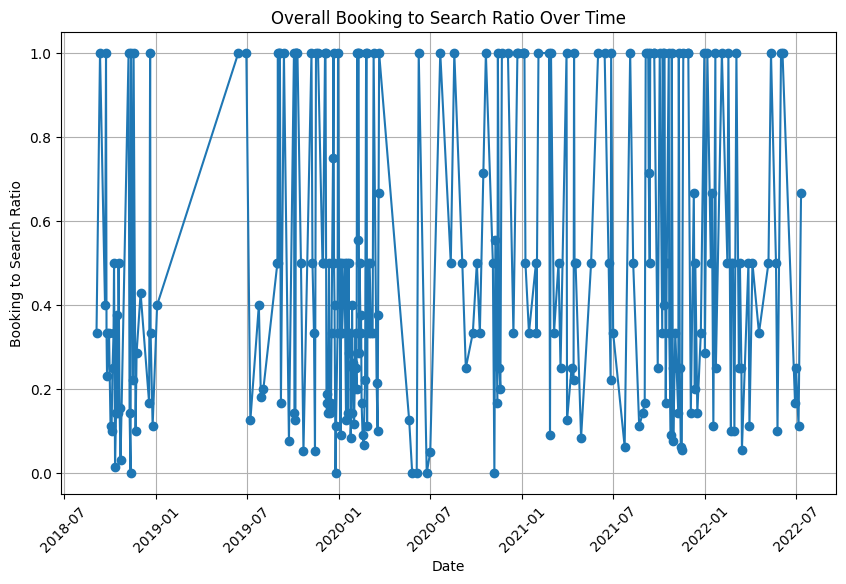

In [27]:
# Plot the time series graph
plt.figure(figsize=(10, 6))
plt.plot(daily_stats.index, daily_stats['booking_to_search_ratio'], marker='o')
plt.xticks(rotation=45) 
plt.xlabel('Date')
plt.ylabel('Booking to Search Ratio')
plt.title('Overall Booking to Search Ratio Over Time')
plt.grid(True)
plt.show()